In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pytrends
from pytrends.request import TrendReq
import pandas as pd

In [40]:
# Limit 5
# Smartphone, Electric Vehicle 
kw_list = ["nft",'metaverse','machine learning','data science','big data']

In [41]:
pytrends = TrendReq(hl='en-US', tz=360)

In [42]:
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', gprop='')

<AxesSubplot:xlabel='date'>

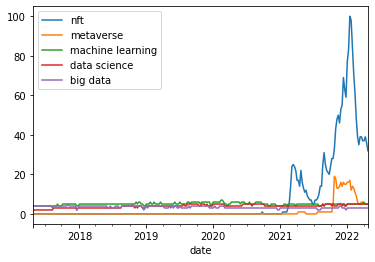

In [43]:
pytrends.interest_over_time().plot()

In [44]:
pytrends.get_historical_interest(kw_list,year_start=2022, month_start=1, day_start=1, hour_start=0, year_end=2022, month_end=4, day_end=23, hour_end=0)

('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


,nft,metaverse,machine learning,data science,big data,isPartial
date,,,,,,
2022-01-01 00:00:00,57,14,2,3,1,False
2022-01-01 01:00:00,57,11,2,4,1,False
2022-01-01 02:00:00,56,14,0,3,1,False
2022-01-01 03:00:00,48,12,4,1,2,False
2022-01-01 04:00:00,56,9,5,3,2,False
...,...,...,...,...,...,...
2022-04-22 21:00:00,80,10,10,8,5,False
2022-04-22 22:00:00,72,10,8,7,5,False
2022-04-22 23:00:00,71,9,9,8,4,False


<AxesSubplot:>

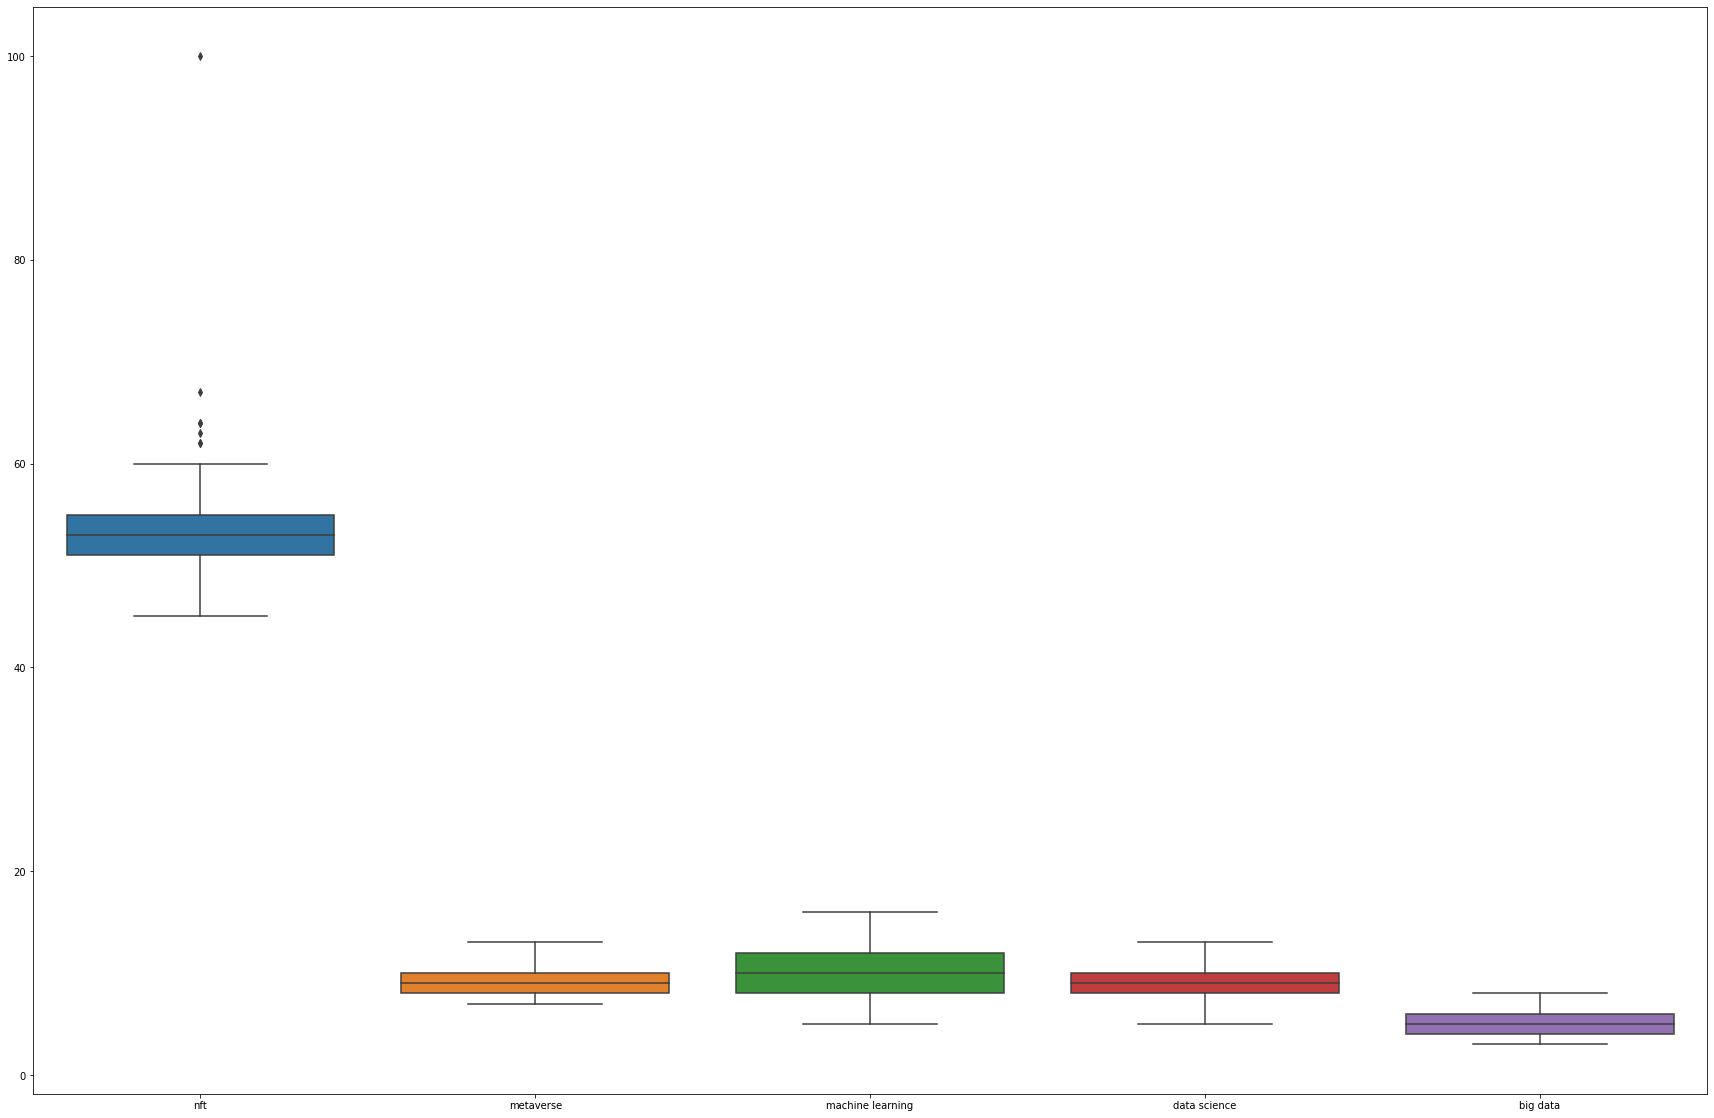

In [45]:
df = pytrends.interest_over_time().iloc[:,:-1]
plt.figure(figsize=(30,20))
sns.boxplot(data = df)

In [46]:
pytrends.related_topics()

{}

In [64]:
main_sample = pd.DataFrame()
for label,meta in pytrends.related_queries().items():
    for tipe,data in meta.items():
        data['topic'] = label
        data['type'] = tipe
        main_sample = pd.concat([main_sample,data])        
        

In [78]:
main_sample.reset_index().drop('index',axis=1,inplace=True)
main_topic_kw = {kw:main_sample.groupby(main_sample['topic']).get_group(kw) for kw in kw_list}
    

In [80]:
for kw,data in main_topic_kw.items():
    data.to_csv(f"./topics/{kw}_keywords.csv",index=False)